In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [134]:
df = pd.read_csv(r"C:\Users\Yeswanth Reddy\OneDrive\Desktop\Telecom Churn Set.csv")

In [135]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [116]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [117]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA).astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [118]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [119]:
df[df.duplicated]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [120]:
df.shape

(7043, 21)

C:\Users\Yeswanth Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Yeswanth Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Yeswanth Reddy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



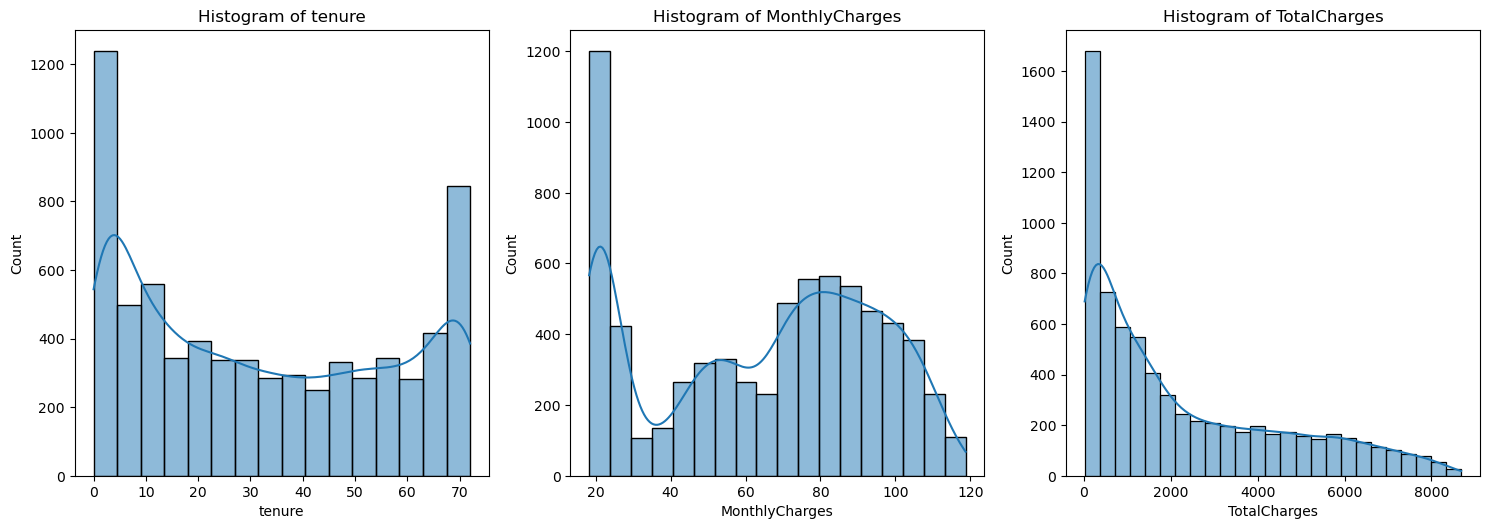

In [121]:
num_variables = ['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_variables):
    plt.subplot(2, 3, i + 1)  # Create subplots, adjust the grid if needed
    sns.histplot(df[var], kde=True)  # Add a Kernel Density Estimate (KDE) for better visualization
    plt.title(f'Histogram of {var}')  # Set title for each subplot
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

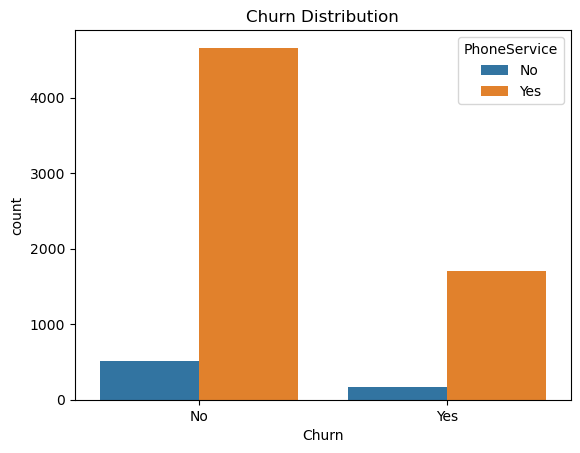

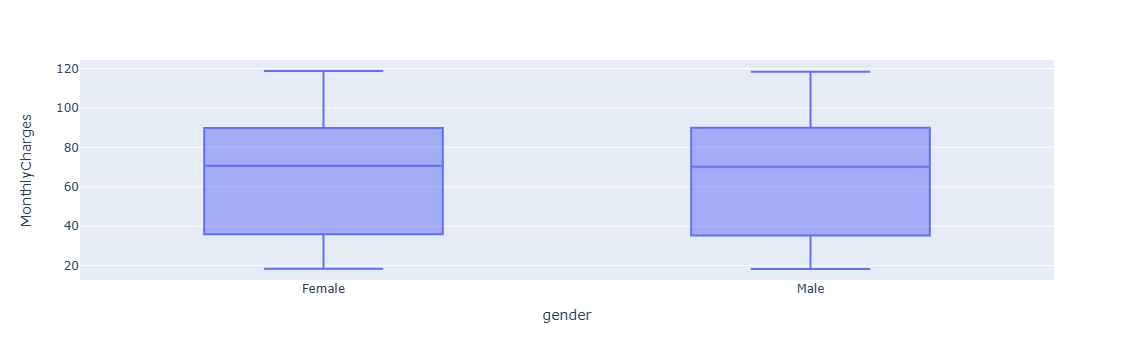

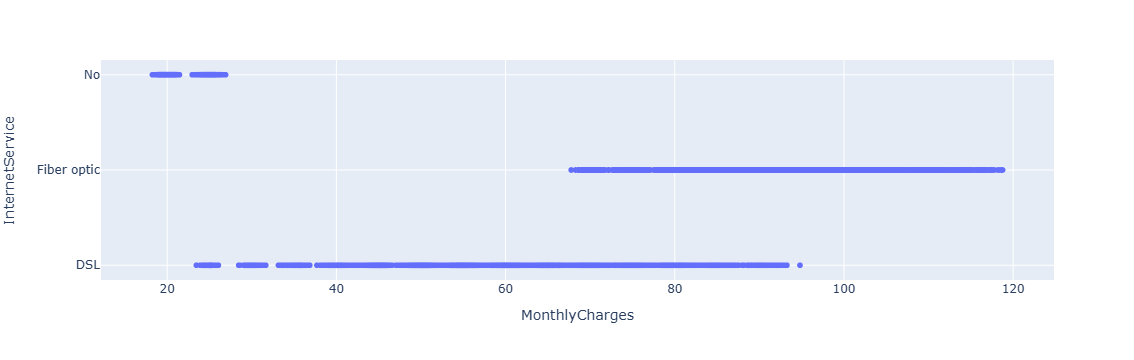

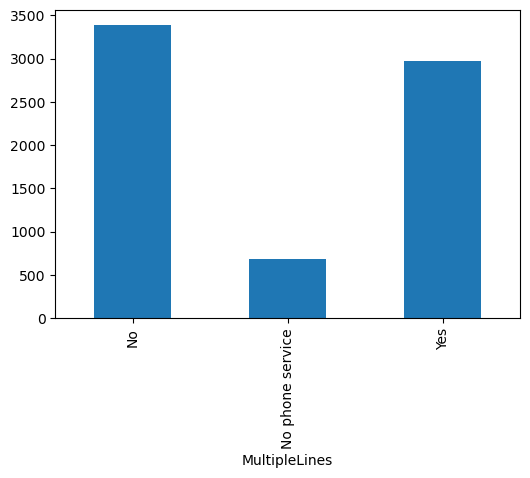

In [122]:
sns.countplot(x='Churn',hue ='PhoneService', data=df)
plt.title('Churn Distribution')
plt.show()

plt.figure(figsize=(6,4))
df.groupby('MultipleLines')['gender'].count().plot(kind='bar');

fig = px.box(df,x='gender',y='MonthlyCharges')
fig.show()

fig = px.scatter(df,x='MonthlyCharges',y='InternetService')
fig.show()

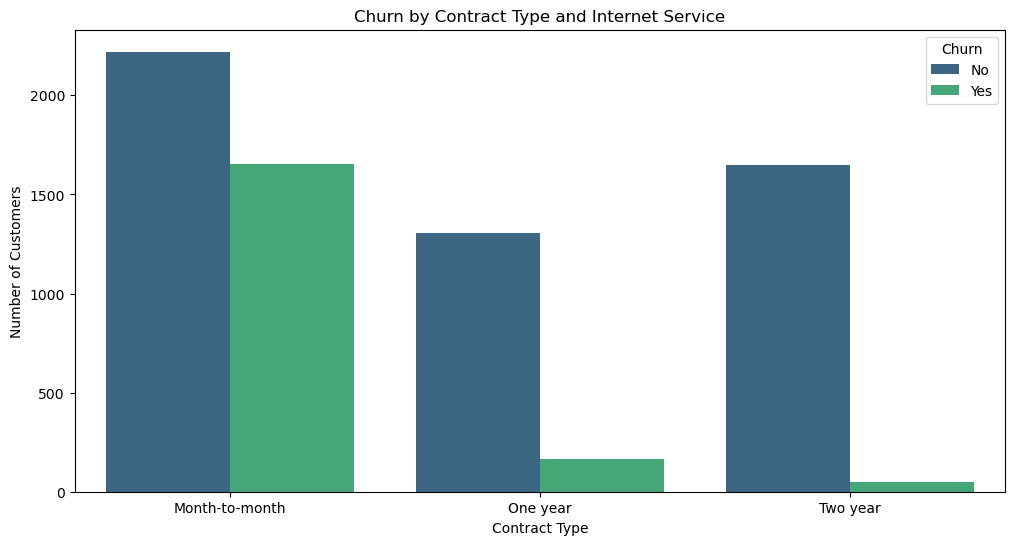

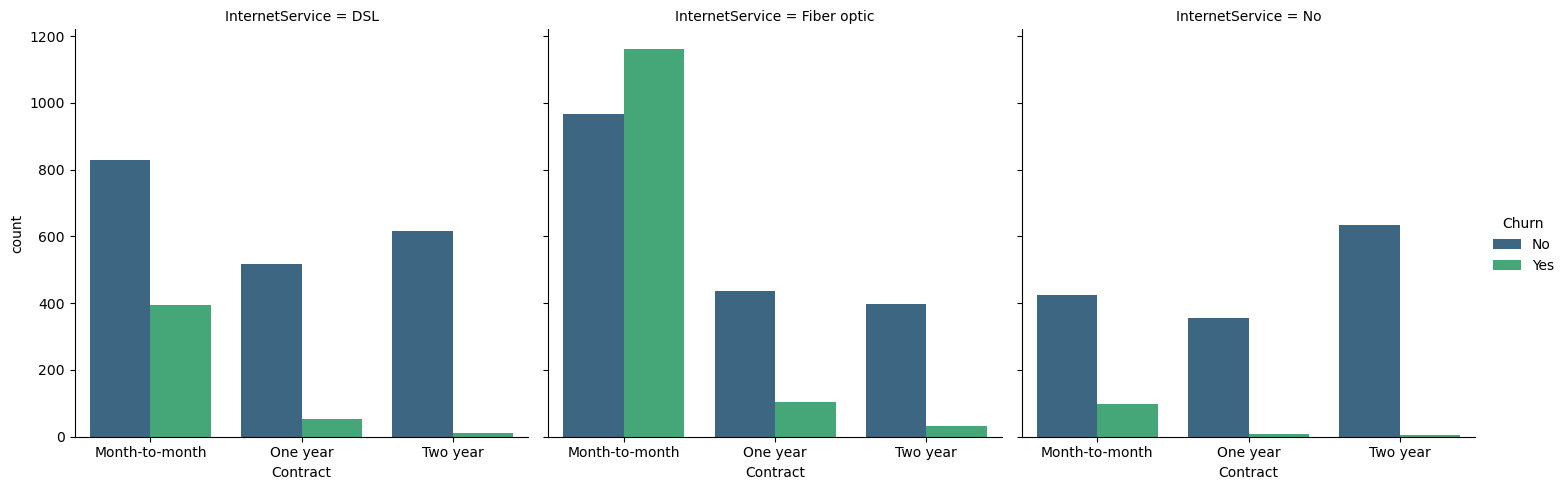

In [123]:
plt.figure(figsize=(12, 6))

# Create a grouped bar plot
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis', hue_order=['No', 'Yes'], 
              order=['Month-to-month', 'One year', 'Two year'])

plt.title('Churn by Contract Type and Internet Service')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

sns.catplot(x='Contract', hue='Churn', col='InternetService', data=df, kind='count', palette='viridis')

plt.show()

In [124]:
numerical_features = df.select_dtypes(include=[np.number]).copy()

In [125]:
from sklearn.preprocessing import OneHotEncoder
df_encoded = df[[ 'gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines','InternetService','Churn']].copy()
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(df_encoded)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(df_encoded.columns))
encoded_df.head()

C:\Users\Yeswanth Reddy\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Churn_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [126]:
df_combined = pd.concat([encoded_df, numerical_features], axis=1)
print(df_combined.round(0).head())

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0          0.0          1.0             0.0               0.0   
1          1.0          0.0             0.0               1.0   
2          1.0          0.0             0.0               1.0   
3          1.0          0.0             0.0               0.0   
4          0.0          0.0             0.0               1.0   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                             1.0                0.0   
1                             0.0                0.0   
2                             0.0                0.0   
3                             1.0                0.0   
4                             0.0                0.0   

   InternetService_Fiber optic  InternetService_No  Churn_Yes  SeniorCitizen  \
0                          0.0                 0.0        0.0              0   
1                          0.0                 0.0        0.0              0   
2                          0.0  

In [127]:
df_combined.describe()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.483033,0.299588,0.903166,0.096834,0.421837,0.439585,0.216669,0.265370,0.162147,32.371149,64.761692,2281.916928
std,0.500013,0.499748,0.458110,0.295752,0.295752,0.493888,0.496372,0.412004,0.441561,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,35.500000,402.225000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,70.350000,1397.475000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,55.000000,89.850000,3786.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000


In [128]:
corr = df_combined.corr()
corr_= corr.round(2)
corr_

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender_Male,1.00,-0.00,0.01,-0.01,0.01,-0.01,-0.01,0.01,-0.01,-0.00,0.01,-0.01,-0.00
Partner_Yes,-0.00,1.00,0.45,0.02,-0.02,0.14,0.00,0.00,-0.15,0.02,0.38,0.10,0.32
Dependents_Yes,0.01,0.45,1.00,-0.00,0.00,-0.02,-0.17,0.14,-0.16,-0.21,0.16,-0.11,0.06
PhoneService_Yes,-0.01,0.02,-0.00,1.00,-1.00,0.28,0.29,0.17,0.01,0.01,0.01,0.25,0.11
MultipleLines_No phone service,0.01,-0.02,0.00,-1.00,1.00,-0.28,-0.29,-0.17,-0.01,-0.01,-0.01,-0.25,-0.11
MultipleLines_Yes,-0.01,0.14,-0.02,0.28,-0.28,1.00,0.37,-0.21,0.04,0.14,0.33,0.49,0.47
InternetService_Fiber optic,-0.01,0.00,-0.17,0.29,-0.29,0.37,1.00,-0.47,0.31,0.26,0.02,0.79,0.36
InternetService_No,0.01,0.00,0.14,0.17,-0.17,-0.21,-0.47,1.00,-0.23,-0.18,-0.04,-0.76,-0.37
Churn_Yes,-0.01,-0.15,-0.16,0.01,-0.01,0.04,0.31,-0.23,1.00,0.15,-0.35,0.19,-0.20
SeniorCitizen,-0.00,0.02,-0.21,0.01,-0.01,0.14,0.26,-0.18,0.15,1.00,0.02,0.22,0.10


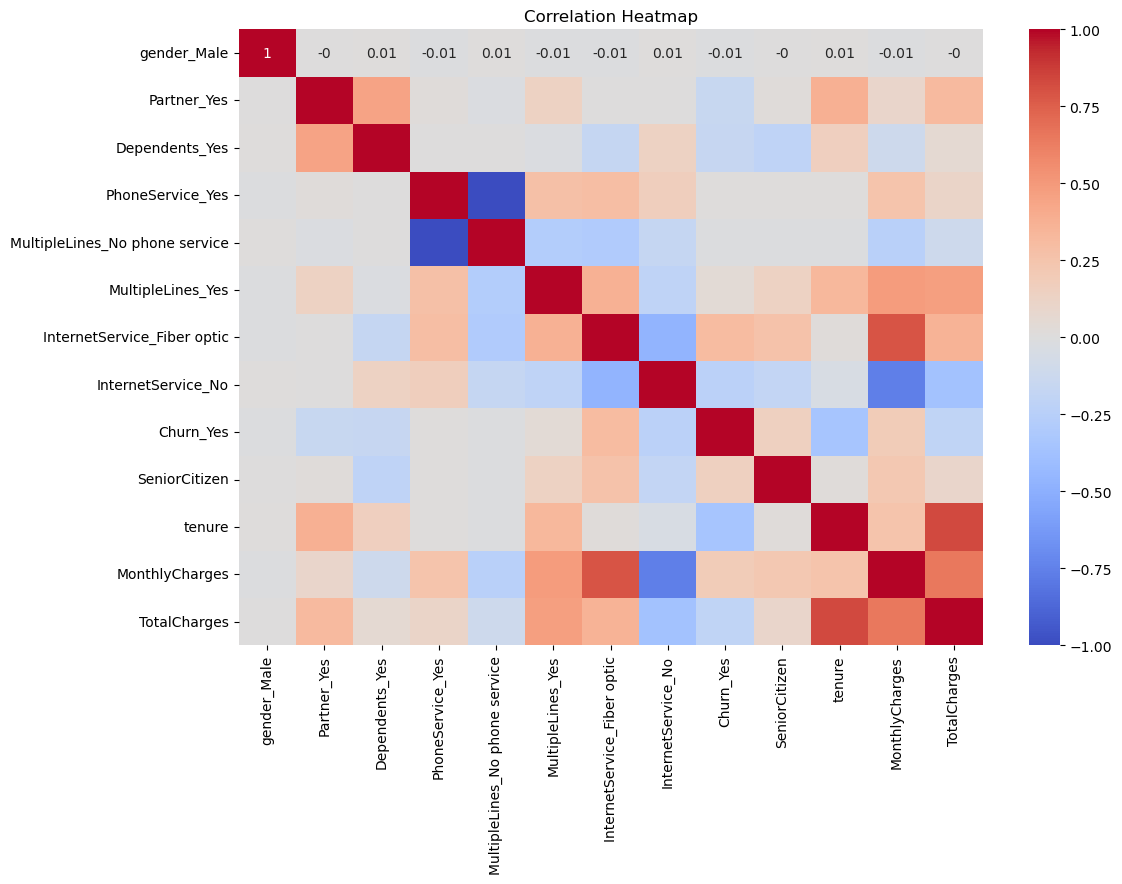

In [129]:
plt.figure(figsize=(12,8))
corr = df_combined.corr()
sns.heatmap(corr_, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Logistic Regression & Random Forest Classifier

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_combined.drop('Churn_Yes', axis=1)
y = df_combined['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions and accuracy
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')

print(classification_report(y_test, y_pred_logreg))

print(confusion_matrix(y_test,y_pred_logreg))

Logistic Regression Accuracy: 0.7835344215755855
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1046
         1.0       0.61      0.46      0.52       363

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

[[937 109]
 [196 167]]


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=1234)
rf.fit(X_train, y_train)

# Predictions and accuracy
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

# Classification report
print(classification_report(y_test, y_pred_rf))

print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7636621717530163
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1046
         1.0       0.55      0.43      0.49       363

    accuracy                           0.76      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409

[[919 127]
 [206 157]]


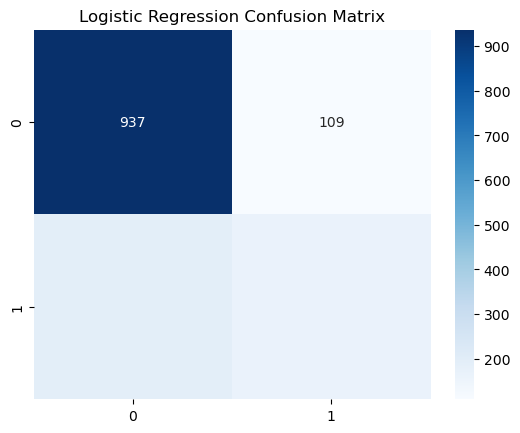

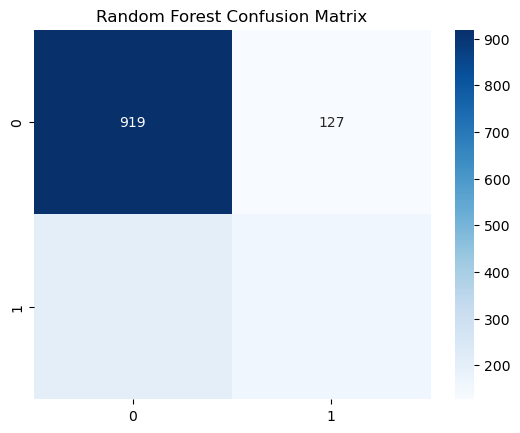

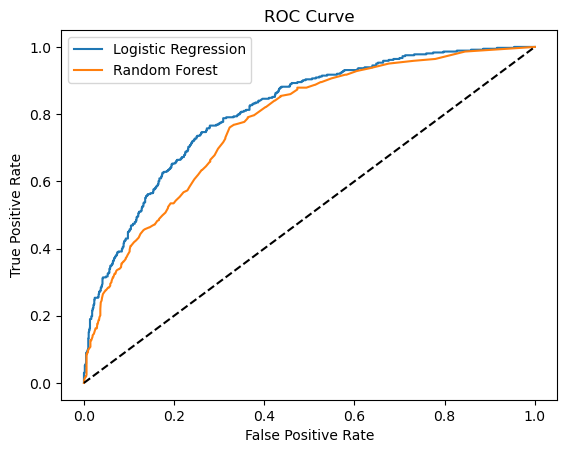

In [132]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC curve for both models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

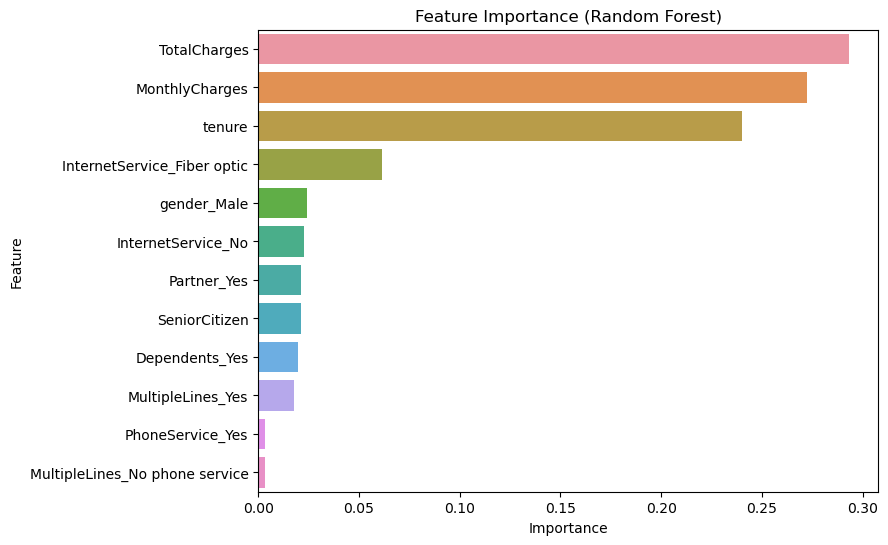

In [110]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()